It is an honour to compare some of the new research literatures in AI from Deepmind.

In [11]:
# Import library
import glob
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
# ... YOUR CODE FOR TASK 1 ...
files.sort()
files

['datasets\\AdaptivePosteriorLearning.txt',
 'datasets\\DualSpacePreconditioningforGradientDescent.txt',
 'datasets\\HybridModelswithDeepandInvertibleFeatures.txt',
 'datasets\\ImprovedKnowledgeDistillationviaTeacherAssistant.txt',
 'datasets\\LearningGentleObjectManipulationwithCuriosityDrivenDeepReinforcementLearning.txt',
 'datasets\\SimultaneouslyLearningVisionandFeatureBasedControlPolicies.txt',
 'datasets\\StatisticsandSamplesinDistributionalReinforcementLearning.txt',
 'datasets\\TheTerminationCritic.txt',
 'datasets\\UnderstandingAgentIncentivesUsingCausalInfluenceDiagrams.txt',
 'datasets\\ValueConstrainedModelFreeContinuousControl.txt',
 'datasets\\WordDiscoveryModels.txt']

Above is the research paper titles

In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []


for n in files:
    # Open each file
    f = open(n, encoding = 'utf-8-sig')
    # Remove all non-alpha-numeric characters
    # ... YOUR CODE FOR TASK 2 ...

    data = re.sub('[\W_]+',' ', f.read())
    # Store the texts and titles of the books in two separate lists
    # ... YOUR CODE FOR TASK 2 ...
    # ... YOUR CODE FOR TASK 2 ...
    titles.append(os.path.basename(n).replace('.txt', ''))
    txts.append(data)
    
[len(t) for t in txts]

[43419, 35385, 40723, 51560, 48962, 53456, 76882, 40932, 73129, 52589, 61551]

In [3]:
# Getting the English stop words from nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Printing out the first eight stop words
# ... YOUR CODE FOR TASK 6 ...
print(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alloq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',

In [4]:
# Convert the text to lower case 
txts_lower_case = [word.lower() for word in txts]

# Transform the text into tokens 
txts_split = [word_lower.split() for word_lower in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in sw]for txt in txts_split]
texts[4][:20]

['learning',
 'gentle',
 'object',
 'manipulation',
 'curiosity',
 'driven',
 'deep',
 'reinforcement',
 'learning',
 'sandy',
 'h',
 'huang',
 '1',
 'martina',
 'zambelli',
 '2',
 'jackie',
 'kay2',
 'murilo',
 'f']

In [5]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
bows = [dictionary.doc2bow(text) for text in texts]
bows[4][:5]

[(0, 50), (7, 1), (8, 44), (9, 9), (10, 4)]

Tf-Idf stands for term frequency–inverse document frequency. This is to measure the weight of the word in a document. There is a formula of calculating the Tf-Idf score of the words. Most high Tf-Idf scores are from the character names.

In [6]:
from gensim.models import TfidfModel
from gensim import similarities
import pandas as pd

#Find the Tfidf(term frequency-inverse document frequency) of the dictionary words. The model defines the importance of each word.
model = model = TfidfModel(bows)
# Compute the similarity matrix (pairwise distance between all texts).
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))
# Add the titles of the books as columns and index of the dataframe
# ... YOUR CODE FOR TASK 10 ...
sim_df.columns = titles
sim_df.index = titles
# Print the resulting matrix
# ... YOUR CODE FOR TASK 10 ...
sim_df

,AdaptivePosteriorLearning,DualSpacePreconditioningforGradientDescent,HybridModelswithDeepandInvertibleFeatures,ImprovedKnowledgeDistillationviaTeacherAssistant,LearningGentleObjectManipulationwithCuriosityDrivenDeepReinforcementLearning,SimultaneouslyLearningVisionandFeatureBasedControlPolicies,StatisticsandSamplesinDistributionalReinforcementLearning,TheTerminationCritic,UnderstandingAgentIncentivesUsingCausalInfluenceDiagrams,ValueConstrainedModelFreeContinuousControl,WordDiscoveryModels
AdaptivePosteriorLearning,1.000000,0.006003,0.053567,0.023323,0.028071,0.030533,0.008764,0.006270,0.015472,0.031367,0.028857
DualSpacePreconditioningforGradientDescent,0.006003,1.000001,0.015658,0.006402,0.005671,0.011336,0.031983,0.007251,0.021701,0.018166,0.005838
HybridModelswithDeepandInvertibleFeatures,0.053567,0.015658,1.000000,0.016515,0.024704,0.029239,0.015531,0.053018,0.019228,0.059601,0.018257
ImprovedKnowledgeDistillationviaTeacherAssistant,0.023323,0.006402,0.016515,1.000000,0.008501,0.014011,0.005811,0.002948,0.026355,0.017312,0.013971
LearningGentleObjectManipulationwithCuriosityDrivenDeepReinforcementLearning,0.028071,0.005671,0.024704,0.008501,1.000000,0.119330,0.021147,0.014444,0.020620,0.243347,0.072619
SimultaneouslyLearningVisionandFeatureBasedControlPolicies,0.030533,0.011336,0.029239,0.014011,0.119330,1.000000,0.019257,0.016516,0.024488,0.138792,0.034860
StatisticsandSamplesinDistributionalReinforcementLearning,0.008764,0.031983,0.015531,0.005811,0.021147,0.019257,1.000000,0.017513,0.017526,0.036448,0.012522
TheTerminationCritic,0.006270,0.007251,0.053018,0.002948,0.014444,0.016516,0.017513,1.000000,0.009785,0.029380,0.010018
UnderstandingAgentIncentivesUsingCausalInfluenceDiagrams,0.015472,0.021701,0.019228,0.026355,0.020620,0.024488,0.017526,0.009785,1.000000,0.032329,0.018931
ValueConstrainedModelFreeContinuousControl,0.031367,0.018166,0.059601,0.017312,0.243347,0.138792,0.036448,0.029380,0.032329,1.000000,0.035069


There is barely any correlation between them. The highest correlation is 0.24 between ValueConstrainedModelFreeContinuousControl and LearningGentleObjectManipulationwithCuriosityDrivenDeepReinforcementLearning 	

In [7]:
# Convert the tf-idf model into a DataFrame
for i, title in enumerate(titles):
    df_tfidf = pd.DataFrame(model[bows][i], columns = ['id', 'score'])

# Name the columns of the DataFrame id and score
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf
# Add the tokens corresponding to the numerical indices for better readability
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])
    df_tfidf['title'] = title
# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf = df_tfidf.sort_values('score', ascending = False)
    
    print(df_tfidf)

        id     score           token                      title
848    893  0.552452          memory  AdaptivePosteriorLearning
1084  1142  0.268798      relational  AdaptivePosteriorLearning
173    192  0.259529             apl  AdaptivePosteriorLearning
1188  1250  0.240991            shot  AdaptivePosteriorLearning
290    314  0.165736  classification  AdaptivePosteriorLearning
405    430  0.164740         decoder  AdaptivePosteriorLearning
929    980  0.148302        omniglot  AdaptivePosteriorLearning
1083  1141  0.148302             rel  AdaptivePosteriorLearning
289    313  0.144971         classes  AdaptivePosteriorLearning
532    563  0.118861        examples  AdaptivePosteriorLearning
499    527  0.118613         encoder  AdaptivePosteriorLearning
868    915  0.110490          module  AdaptivePosteriorLearning
126    143  0.110120        accuracy  AdaptivePosteriorLearning
805    847  0.105468            lstm  AdaptivePosteriorLearning
850    895  0.105433            meta  Ad

        id     score            token  \
1224  4789  0.487729              cup   
1163  4728  0.359353             ball   
989   4397  0.265616            robot   
1187  4752  0.186224            catch   
1099  4664  0.150753               5f   
1632  5197  0.133017              sac   
1682  5247  0.115281         sproprio   
1100  4665  0.115281               5p   
1592  5157  0.107175              raw   
1698  5263  0.106414           string   
185    590  0.101009          feature   
1373  4938  0.097546           height   
1647  5212  0.097546        sfeatures   
503   1518  0.094147                σ   
973   4338  0.091933           policy   
1768  5333  0.088678            vicon   
1069  4634  0.088678               1f   
1659  5224  0.088678           simage   
974   4340  0.086044         position   
762   2859  0.084559       simulation   
1556  5121  0.081958        positions   
689   2534  0.081958           filter   
1183  4748  0.079810          cameras   
1088  4653  0.07

        id     score           token                title
1568  7974  0.634988           ndigo  WordDiscoveryModels
1584  7990  0.380993              ot  WordDiscoveryModels
1677  8083  0.269235           visit  WordDiscoveryModels
1191  6478  0.252804            room  WordDiscoveryModels
1391  7797  0.193036              bt  WordDiscoveryModels
870   3491  0.158587          object  WordDiscoveryModels
1140  5347  0.130013           white  WordDiscoveryModels
1593  7999  0.121918             pbt  WordDiscoveryModels
1611  8017  0.101598              pt  WordDiscoveryModels
1490  7896  0.101598             gru  WordDiscoveryModels
1006  4291  0.096438         objects  WordDiscoveryModels
582   1741  0.093539       discovery  WordDiscoveryModels
923   3860  0.090965           agent  WordDiscoveryModels
1497  7903  0.086358              ht  WordDiscoveryModels
1384  7790  0.086358        bouncing  WordDiscoveryModels
1192  6479  0.083064           rooms  WordDiscoveryModels
979   4147  0.

Text(0.5,1,'Similarity Value for Value Constrained Model Free Continous Control')

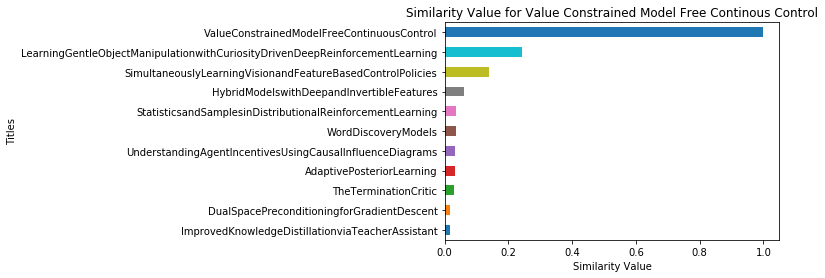

In [12]:
# This is needed to display plots in a notebook
%matplotlib inline

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['ValueConstrainedModelFreeContinuousControl'] 

# Sort by ascending scores
v_sorted = v.sort_values(ascending = True)

# Plot this data has a horizontal bar plot
# ... YOUR CODE FOR TASK 11 ...
v_sorted.plot.barh(x = 'lab', y = 'val', rot = 0).plot
# Modify the axes labels and plot title for a better readability
# ... YOUR CODE FOR TASK 11 ...
plt.xlabel('Similarity Value')
plt.ylabel('Titles')
plt.title('Similarity Value for Value Constrained Model Free Continous Control')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [42.5, 42.5, 81.25, 81.25],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 1.0718647046369578, 1.0718647046369578, 0.0],
  [0.0, 1.28826068981008, 1.28826068981008, 1.0718647046369578],
  [0.0, 1.3396929126708397, 1.3396929126708397, 0.0],
  [0.0, 1.3847400805346113, 1.3847400805346113, 1.3396929126708397],
  [0.0, 1.369279572428621, 1.369279572428621, 0.0],
  [0.0, 1.37730330660775, 1.37730330660775, 0.0],
  [0.0, 1.3974958581463515, 1.3974958581463515, 1.37730330660775],
  [1.369279572428621,
   1.4249208996970593,
   1.4249208996970593,
   1.3974958581463515],
  [1.3847400805346113,
   1.439586271322385,
   1.439586271322385,
   1.4249208996970593],
  [1.28826068981008,
   1.6579632484164104,
   1.6579632484164104,
   1.439586271322385]],
 'ivl'

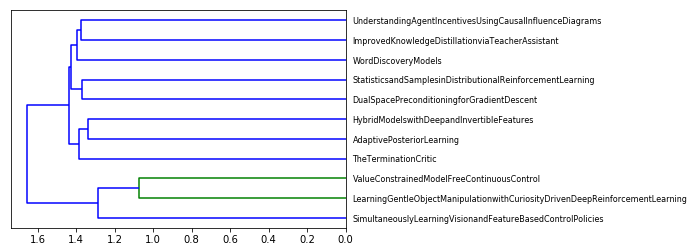

In [9]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
# ... YOUR CODE FOR TASK 12 ...
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation="left")

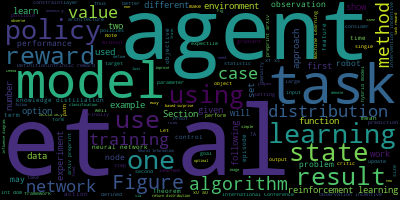

In [10]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
long_string = ' '.join(txts)

wordcloud.generate(long_string)
wordcloud.to_image()

Not a surprise, the word counts the most are closely related to AI such as 'model', 'ai', agent and 'task'.